In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
s=pd.read_csv('smoke_data/HMS_USpopBG_2010_2019.csv', nrows = 100)
s.head()

,date,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,POPULATION,light,medium,heavy
0,20100601,2,50,100,6,980,1,NaN,NaN
1,20100601,2,50,300,2,448,1,NaN,NaN
2,20100601,2,68,100,1,308,1,1.0,1.0
3,20100601,2,68,100,2,1518,1,1.0,NaN
4,20100601,2,70,100,1,835,1,NaN,NaN


In [3]:
import pandas as pd

chunk_size = 1e6
chunks = []
i = 0
for chunk in pd.read_csv('smoke_data/HMS_USpopBG_2010_2019.csv', chunksize=chunk_size):
    chunk = chunk[chunk['STATEFP'] == 8]  
    if chunk.empty:
        continue
    chunks.append(chunk)
    i +=1
    print(i)

# Combine filtered chunks into a single DataFrame
print('combine')
JV_smoke_data = pd.concat(chunks, ignore_index=True)


1
2
3
4
5


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [39]:
weighted_smoke = JV_smoke_data
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Define the custom function
def calculate_weighted_average(row):
    light = row['light']
    medium = row['medium'] * 2 if not np.isnan(row['medium']) else np.nan
    heavy = row['heavy'] * 3 if not np.isnan(row['heavy']) else np.nan
    values = [light, medium, heavy]
    valid_values = [v for v in values if not np.isnan(v)]
    if valid_values:
        return np.mean(valid_values)
    else:
        return np.nan

# Apply the function to each row
weighted_smoke['weighted'] = weighted_smoke.apply(calculate_weighted_average, axis=1)

In [41]:
weighted_smoke = weighted_smoke.drop(columns=['light', 'medium', 'heavy'])
weighted_smoke

,date,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,POPULATION,weighted
0,20100612,8,3,960000,1,720,1.0
1,20100612,8,3,960100,2,771,1.0
2,20100612,8,3,960100,3,925,1.0
3,20100612,8,3,960200,1,1226,1.0
4,20100612,8,21,974900,3,985,1.5
...,...,...,...,...,...,...,...
923214,20191114,8,7,974300,1,857,2.0
923215,20191114,8,7,974300,2,1392,2.5
923216,20191114,8,7,974300,3,1238,2.0
923217,20191114,8,7,974400,1,1142,2.0


In [77]:
weighted_smoke_fixed = weighted_smoke
weighted_smoke_fixed['date'] = pd.to_datetime(weighted_smoke['date'], format='%Y%m%d')  # Adjust the format as per your date format

# Extract the year from the 'date' column and create a new column 'year'
weighted_smoke_fixed['year'] = weighted_smoke_fixed['date'].dt.year
weighted_smoke_fixed.to_csv('smoke_data/weighted_smoke_CO.csv')
weighted_smoke_fixed

,date,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,POPULATION,weighted,year
0,2010-06-12,8,3,960000,1,720,1.0,2010
1,2010-06-12,8,3,960100,2,771,1.0,2010
2,2010-06-12,8,3,960100,3,925,1.0,2010
3,2010-06-12,8,3,960200,1,1226,1.0,2010
4,2010-06-12,8,21,974900,3,985,1.5,2010
...,...,...,...,...,...,...,...,...
923214,2019-11-14,8,7,974300,1,857,2.0,2019
923215,2019-11-14,8,7,974300,2,1392,2.5,2019
923216,2019-11-14,8,7,974300,3,1238,2.0,2019
923217,2019-11-14,8,7,974400,1,1142,2.0,2019


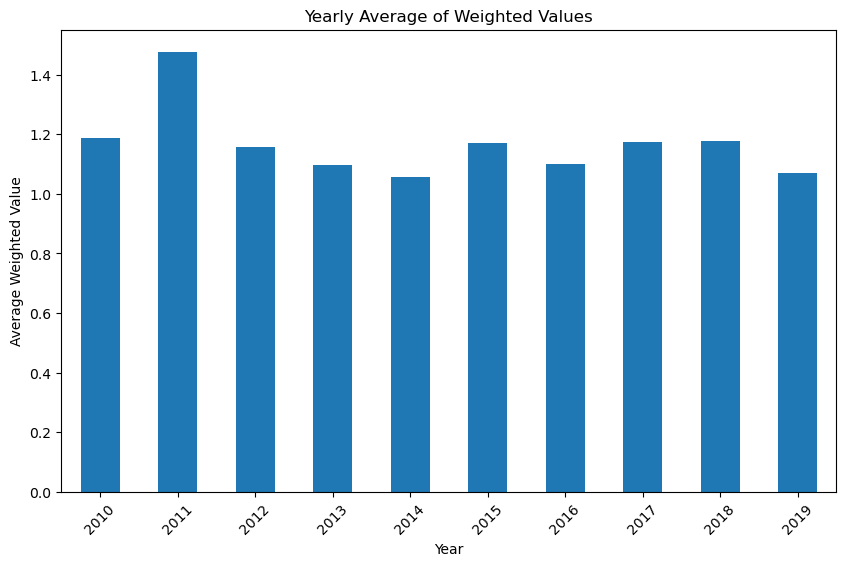

In [4]:
weighted_smoke_fixed = pd.read_csv('smoke_data/weighted_smoke_CO.csv')
yearly_averages = weighted_smoke_fixed.groupby('year')['weighted'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as per your requirement
yearly_averages.plot(kind='bar')
plt.title('Yearly Average of Weighted Values')
plt.xlabel('Year')
plt.ylabel('Average Weighted Value')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [5]:
census_data = pd.read_csv('census_data/census_data.csv')
census_data.head()

,Name,MedianHouseValue,State,County,year
0,"Autauga County, Alabama",133900.0,1,1,2010
1,"Baldwin County, Alabama",177200.0,1,3,2010
2,"Barbour County, Alabama",88200.0,1,5,2010
3,"Bibb County, Alabama",81200.0,1,7,2010
4,"Blount County, Alabama",113700.0,1,9,2010


In [6]:
import pandas as pd

# Assuming weighted_smoke_fixed is your smoke data DataFrame

# Convert STATEFP and COUNTYFP to integer if they are not already
weighted_smoke_fixed['STATEFP'] = weighted_smoke_fixed['STATEFP'].astype(int)
weighted_smoke_fixed['COUNTYFP'] = weighted_smoke_fixed['COUNTYFP'].astype(int)

# Aggregate to get the yearly average of the 'weighted' values
yearly_avg_weighted = weighted_smoke_fixed.groupby(['year', 'STATEFP', 'COUNTYFP'])['weighted'].mean().reset_index()
# Assuming census_data is your census data DataFrame

# Rename columns in census_data for consistency
census_data.rename(columns={'State': 'STATEFP', 'County': 'COUNTYFP'}, inplace=True)

# Convert State and County columns in census_data to integer if they are not already
census_data['STATEFP'] = census_data['STATEFP'].astype(int)
census_data['COUNTYFP'] = census_data['COUNTYFP'].astype(int)

# Merge the DataFrames
merged_data = pd.merge(yearly_avg_weighted, census_data, left_on=['year', 'STATEFP', 'COUNTYFP'], right_on=['year', 'STATEFP', 'COUNTYFP'])

merged_data.to_csv('merged_smoke_and_census/merged_data.csv')

merged_data.head()


,year,STATEFP,COUNTYFP,weighted,Name,MedianHouseValue
0,2010,8,1,1.275268,"Adams County, Colorado",196100.0
1,2010,8,1,1.275268,"Adams County, Colorado",196100.0
2,2010,8,3,1.000000,"Alamosa County, Colorado",131100.0
3,2010,8,3,1.000000,"Alamosa County, Colorado",131100.0
4,2010,8,5,1.216874,"Arapahoe County, Colorado",232300.0


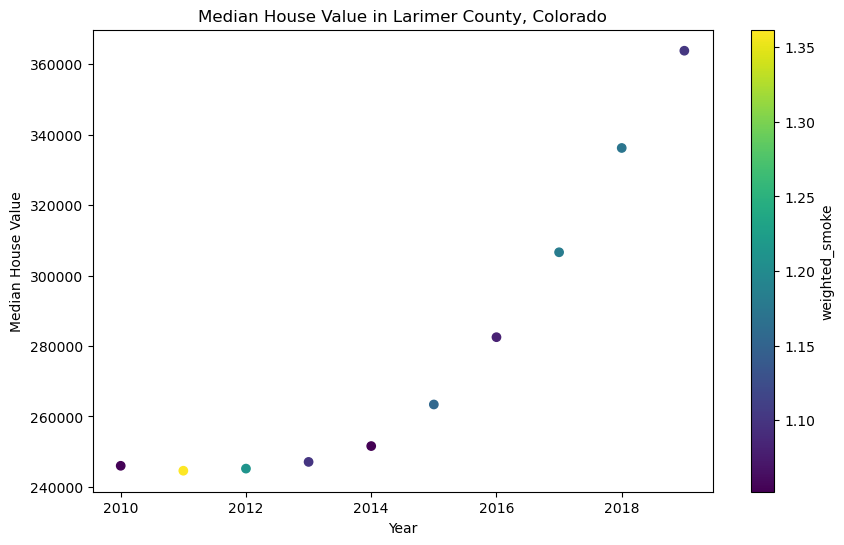

In [7]:
#merged_data_CO = merged_data[merged_data['State'] == 8]
merged_data_CO = merged_data[merged_data['COUNTYFP'] == 69]
merged_data_CO = merged_data_CO.drop_duplicates(subset=['year', 'STATEFP', 'COUNTYFP'])
merged_data_CO = merged_data_CO[merged_data_CO['MedianHouseValue'] >= 0]
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_data_CO['year'],merged_data_CO['MedianHouseValue'],
           c=merged_data_CO['weighted'], 
                      cmap='viridis')
# Adding a colorbar to represent the year
cbar = plt.colorbar(scatter)
cbar.set_label('weighted_smoke')
plt.title('Median House Value in Larimer County, Colorado')
plt.xlabel('Year')
plt.ylabel('Median House Value')
plt.show()


In [8]:
merged_data = merged_data.sort_values(by='year')
merged_data['net_price_change'] = merged_data['MedianHouseValue'] - merged_data['MedianHouseValue'].shift(1)
merged_data['net_price_change'].fillna(0, inplace=True)
correlation = merged_data['weighted'].corr(merged_data['net_price_change'])
print("Correlation between Weighted Smoke and Net Price Change:", correlation)

Correlation between Weighted Smoke and Net Price Change: 0.01800396266451021


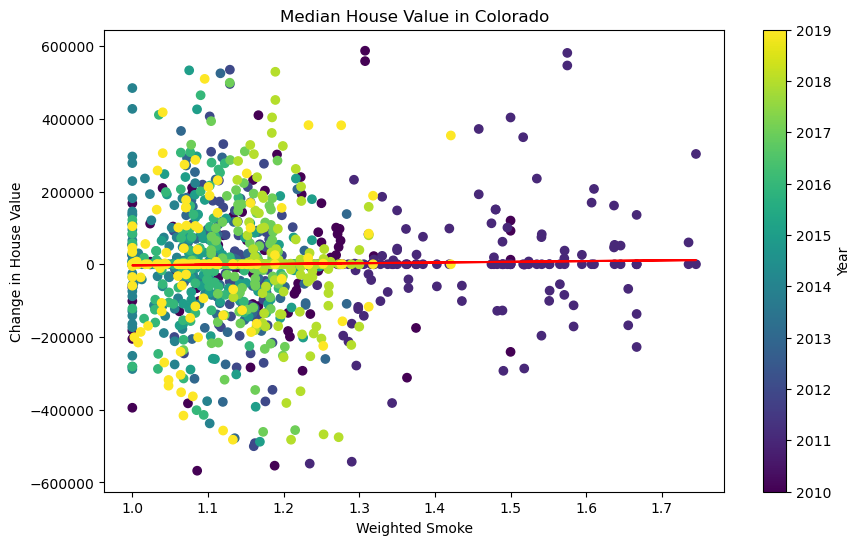

In [12]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_data['weighted'], merged_data['net_price_change'],
                      c=merged_data['year'], cmap='viridis')

# Add a colorbar to represent the year
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Calculate coefficients for the line of best fit
m, b = np.polyfit(merged_data['weighted'], merged_data['net_price_change'], 1)

# Add the line of best fit to the plot
plt.plot(merged_data['weighted'], m * merged_data['weighted'] + b, color='red')

# Adding plot titles and labels
plt.title('Median House Value in Colorado')
plt.xlabel('Weighted Smoke')
plt.ylabel('Change in House Value')

# Show the plot
plt.show()


In [16]:
# Filter for fire season months (June to September, inclusive)
fire_season_df = weighted_smoke_fixed #[weighted_smoke_fixed['date'].dt.month.isin([8, 9,10])]

# Define the state and counties of interest
counties = [33, 39, 14, 5, 35, 1, 59, 13, 69, 73, 41, 123]

# Filter the DataFrame
filtered_df = fire_season_df[fire_season_df['COUNTYFP'].isin([county for county in counties])]
# Calculate the average weighted smoke per year
average_smoke_per_year = filtered_df.groupby('year')['weighted'].mean()
average_smoke_per_year

year
2010    1.180837
2011    1.508372
2012    1.165232
2013    1.089883
2014    1.062927
2015    1.186332
2016    1.093538
2017    1.183541
2018    1.171098
2019    1.065616
Name: weighted, dtype: float64

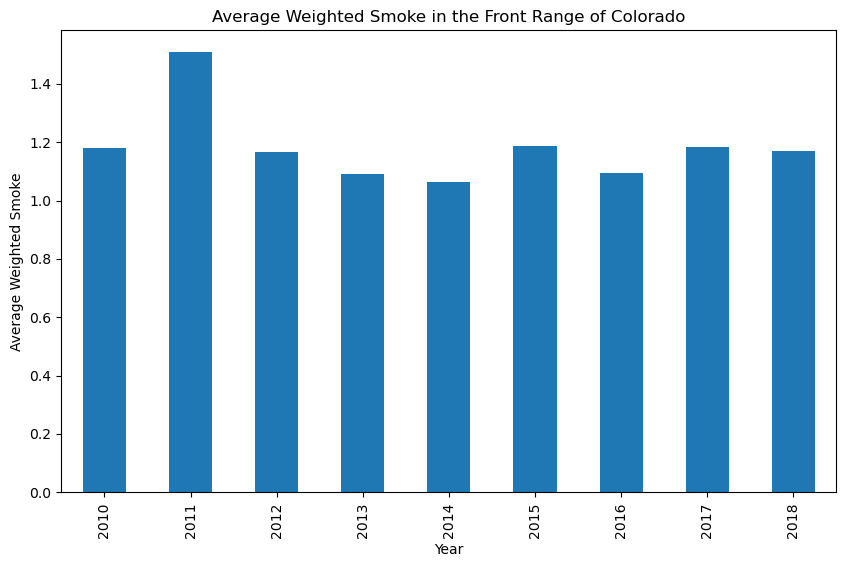

In [17]:
import matplotlib.pyplot as plt

# Plotting the average weighted smoke over the years
plt.figure(figsize=(10, 6))
average_smoke_per_year = average_smoke_per_year.iloc[:-1]
average_smoke_per_year.plot(kind='bar')
plt.title('Average Weighted Smoke in the Front Range of Colorado')
plt.xlabel('Year')
plt.ylabel('Average Weighted Smoke')
plt.show()
